<a href="https://colab.research.google.com/github/DanielaCorado/Portfolio/blob/main/Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**


Para este projeto, estarei explorando dados disponíveis publicamente de LendingClub.com.
O Lending Club conecta pessoas que precisam de dinheiro com pessoas que têm dinheiro. Como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Irei criar um modelo que ajude a prever isso.


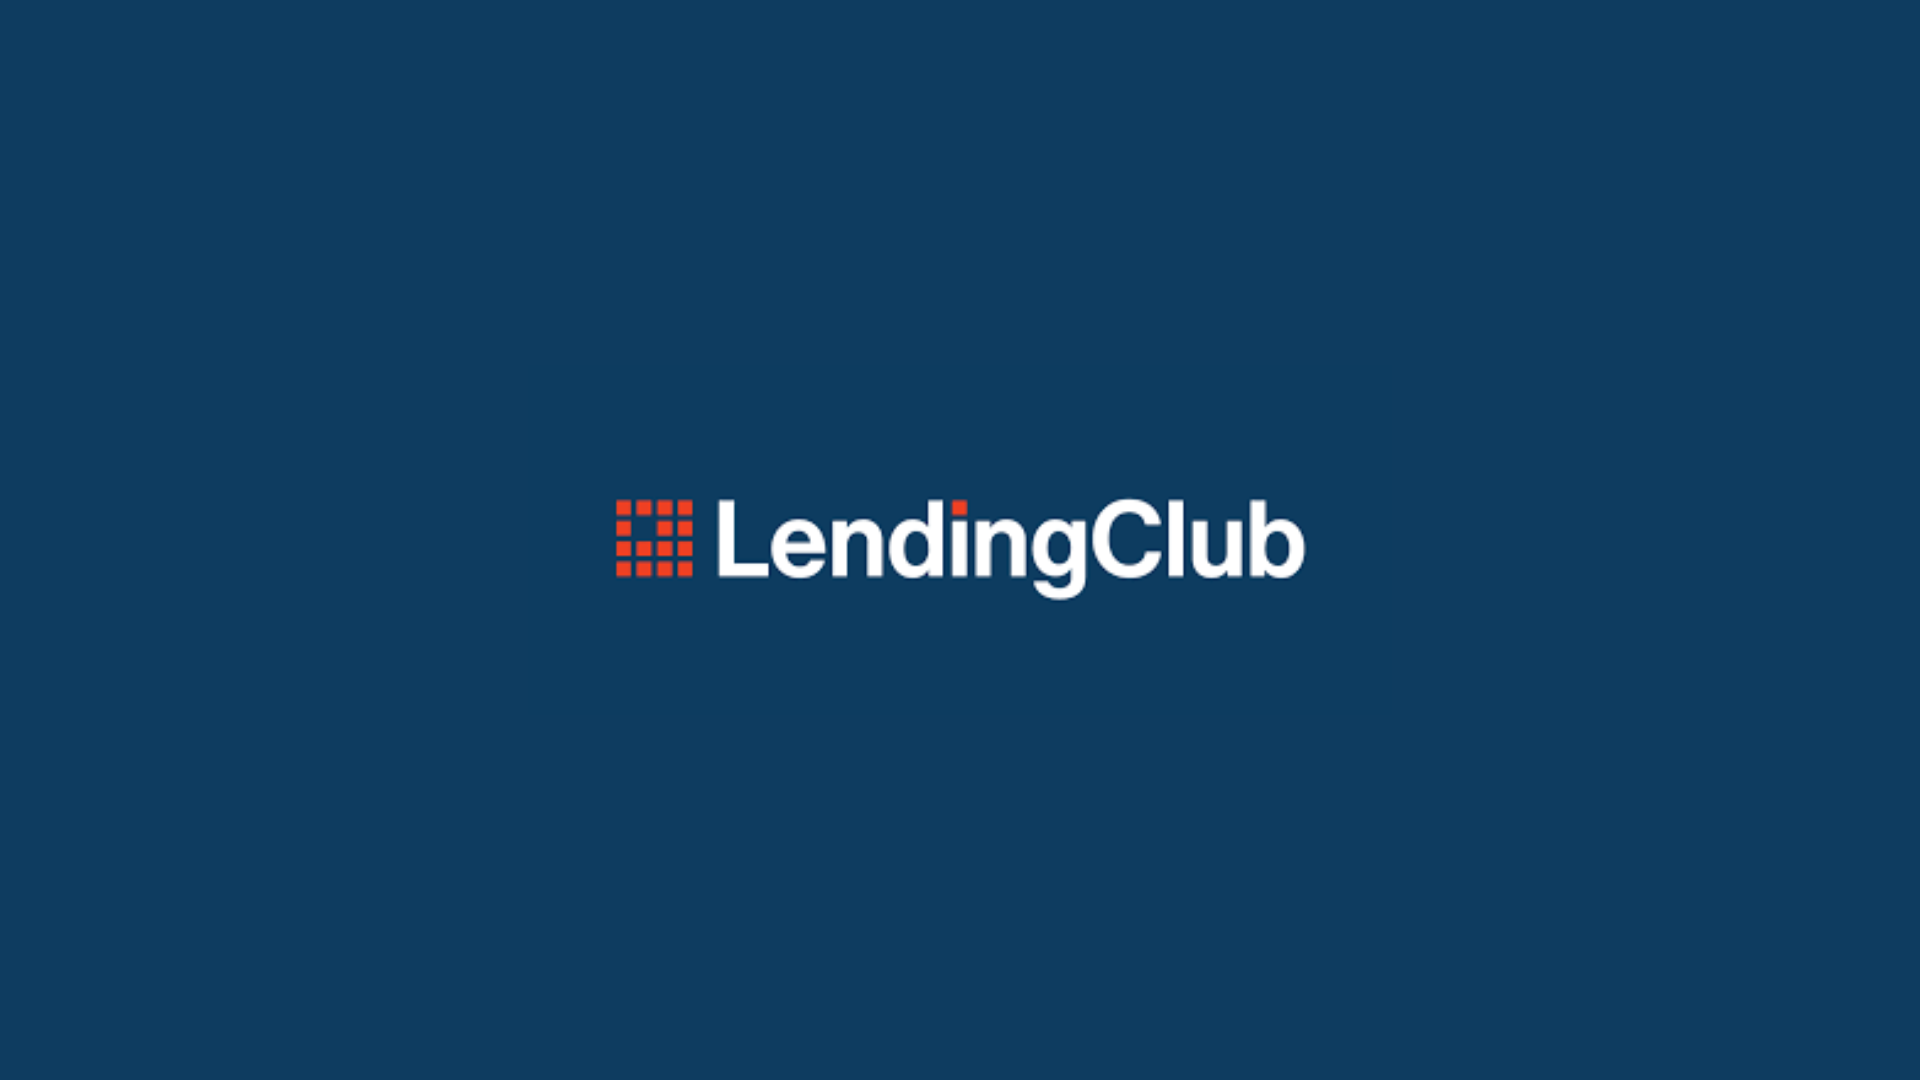

# **Importação dos dados**

**Importando as bibliotecas**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importando os dados**

In [2]:
loans = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio/08 - Árvore e Floresta/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


* Sem dados faltantes

In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# **Exploração dos dados**

**Analisando o Parâmetro fico e credit.policy**

* Sobreporto

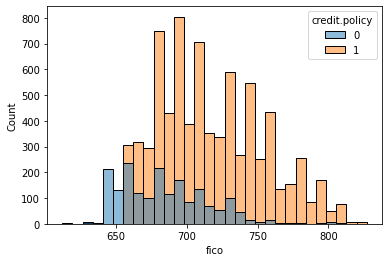

In [5]:
sns.histplot(data=loans,x='fico',hue='credit.policy',bins=30)
plt.show()


* Individualmente

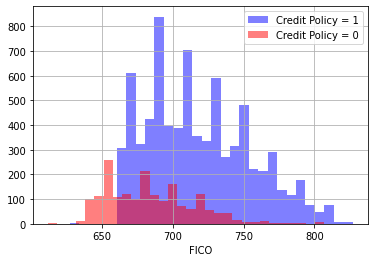

In [6]:
loans[loans['credit.policy']==1]['fico'].hist(bins=30,color='blue',alpha=0.5,label='Credit Policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(bins=30,color='red',alpha=0.5,label='Credit Policy = 0')
plt.legend()
plt.xlabel('FICO')
plt.show()

**Analisando o parâmetro fico e not.fully.paid**

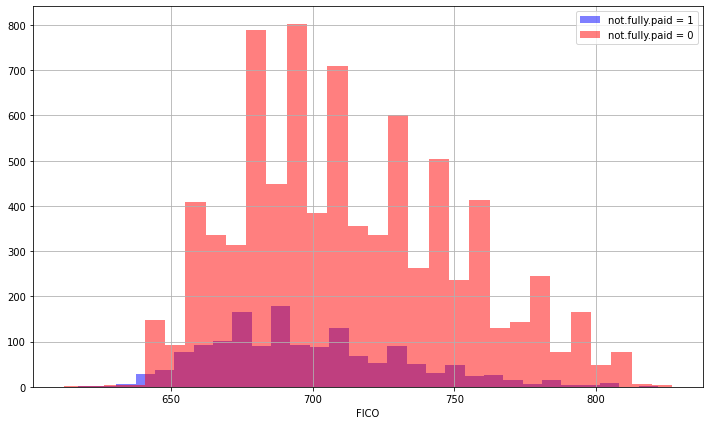

In [7]:
plt.figure(figsize=(12,7))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30,color='blue',alpha=0.5,label='not.fully.paid = 1')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30,color='red',alpha=0.5,label='not.fully.paid = 0')
plt.legend()
plt.xlabel('FICO')
plt.show()

*  A variável fico não parece ser determinante se a pessoa paga ou não

**Analisando o parâmetro Purpose e not.fully.paid**

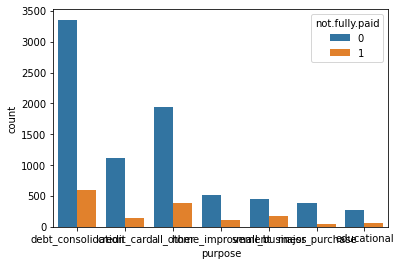

In [8]:
sns.countplot(data=loans,x='purpose',hue='not.fully.paid')
plt.show()

**Relação entre Fico e Taxa de Juros**

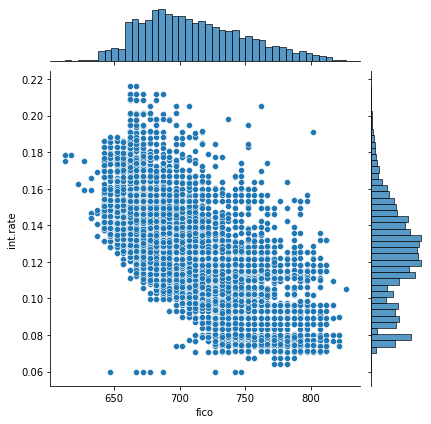

In [9]:
sns.jointplot(data=loans,x='fico',y='int.rate')
plt.show()

**Visão geral dos parâmetros analisados**

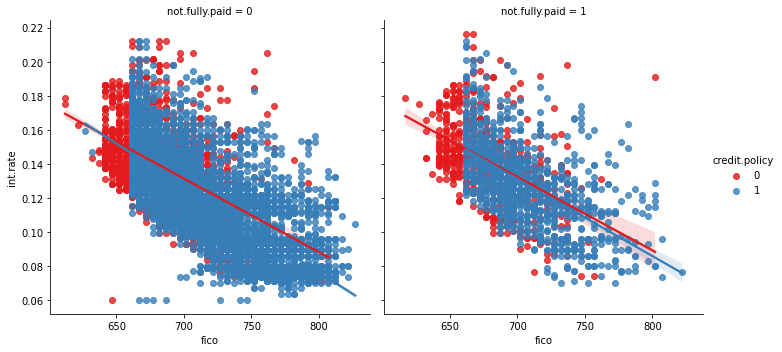

In [10]:
sns.lmplot(data=loans,y='int.rate',x='fico',hue='credit.policy',col='not.fully.paid',palette='Set1')
plt.show()

# **Modelo Árvore Aleatória**

**Tratar os dados categoricos**

In [12]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

**Treino/Test dos dados**

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(final_data.drop('not.fully.paid',axis=1),final_data['not.fully.paid'],test_size=0.3)

**Treinando o modelo**

In [14]:
from sklearn.tree import DecisionTreeClassifier
final_data = DecisionTreeClassifier()
final_data.fit(x_train,y_train) # Treinando o modelo
pred = final_data.predict(x_test) # Predições

**Ver eficiência do modelo Ávore de decisão**

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)

array([[2001,  403],
       [ 370,  100]])

In [18]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.83      0.84      2404\n           1       0.20      0.21      0.21       470\n\n    accuracy                           0.73      2874\n   macro avg       0.52      0.52      0.52      2874\nweighted avg       0.74      0.73      0.73      2874\n'

* **Precisão em torno de 74%**

# **Modelo Floresta Aleatória**

**Aplicação do Modelo Floresta de decisão**

In [19]:
from sklearn.ensemble import RandomForestClassifier
final_data = RandomForestClassifier(n_estimators=200) # Define o número de árvores aleátorias
final_data.fit(x_train,y_train) # Treinando o modelo
predfinal = final_data.predict(x_test) # Predições

**Eficiência do modelo Floresta de decisão**

In [20]:
classification_report(y_test,predfinal)


'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.91      2404\n           1       0.57      0.02      0.03       470\n\n    accuracy                           0.84      2874\n   macro avg       0.70      0.51      0.47      2874\nweighted avg       0.79      0.84      0.77      2874\n'

In [21]:
confusion_matrix(y_test,predfinal)

array([[2398,    6],
       [ 462,    8]])

* **Precisão  em torno de 78%** 

# **Conclusão**

* Apesar de ter uma precisão maior no modelo de Florestas, na ótica do Recall para quem não pagou, o modelo de árvore se saiu melhor
* Na maioria das vezes o modelo de floresta é superior ao de árvores